<h1> Dhaka air quality </h1>

This project aims to analyse the air quality data for Dhaka city since 2016.

The data is collected from the US Embassy in Dhaka, which records hourly air quality measurements using a monitor on their roof. Their instrument measures the average concentration of fine particle pollutants (PM2.5) in the air over an hour and converts this into an Air Quality Index (AQI) value. AQI is a numerical scale, between 0 and 500, informing how potentially dangerous the air is to health, where small numbers are good and large numbers are bad.

The recognised acceptable standard for AQI is up to 100, once the quality of air degrades to an AQI above 100, sensitive groups of people may experience adverse health effects. AQI values above 150 are considered "unhealthy", meaning everyone begins to be at risk of adverse health issues, the severity of which increases as the AQI gets larger -- with air deemed "very unhealthy" at AQI in excess of 200 and "extremely unhealthy" above 300.

<h2> Pre-processing </h2>

This notebook imports the data from the US Embassy and cleans the dataset, removing poor data measurements and exports the clean dataframe as a csv file to be analysed in the subsequence "analysis and visualisation" notebook.

In [1]:
import pandas as pd
from pathlib import Path
from datetime import datetime

In [2]:
today = datetime.today()

In [3]:
years = [*range(2016, today.year+1)]
datapath = Path.cwd().parent.joinpath('data')
month = str(f'{today.month:02d}')
df = pd.concat([pd.read_csv(f'{datapath}/Dhaka_PM2.5_{year}_YTD.csv', parse_dates=['Date (LT)'], index_col='Date (LT)') for year in years])
df = pd.concat([df, pd.read_csv(f'{datapath}/Dhaka_PM2.5_{today.year}_{month}_MTD.csv', parse_dates=['Date (LT)'], index_col='Date (LT)')])

In [4]:
# print(f'Number of measurements with AQI < 0 which is impossible unless measurement error: {len(df[df["AQI"]<0])}')
# print(f'Total number of measurements: {len(df)}, so bad data is {round(100*len(df[df["AQI"]<0])/len(df),2)} %' )

In [5]:
df.tail()

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
Date (LT),,,,,,,,,,,,,
2020-10-27 20:00:00,Dhaka,PM2.5 - Principal,2020,10,27,20,100.0,174,Unhealthy,103.0,UG/M3,1 Hr,Valid
2020-10-27 21:00:00,Dhaka,PM2.5 - Principal,2020,10,27,21,112.0,180,Unhealthy,125.0,UG/M3,1 Hr,Valid
2020-10-27 22:00:00,Dhaka,PM2.5 - Principal,2020,10,27,22,124.7,187,Unhealthy,137.0,UG/M3,1 Hr,Valid
2020-10-27 23:00:00,Dhaka,PM2.5 - Principal,2020,10,27,23,132.8,191,Unhealthy,141.0,UG/M3,1 Hr,Valid
2020-10-28 00:00:00,Dhaka,PM2.5 - Principal,2020,10,28,0,132.9,191,Unhealthy,133.0,UG/M3,1 Hr,Valid


In [6]:
# df['Date'] = pd.to_datetime(df['Date (LT)'])
# df = df.drop(columns=['Date (LT)'])

In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39932 entries, 2016-01-01 01:00:00 to 2020-10-28 00:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           39932 non-null  object 
 1   Parameter      39932 non-null  object 
 2   Year           39932 non-null  int64  
 3   Month          39932 non-null  int64  
 4   Day            39932 non-null  int64  
 5   Hour           39932 non-null  int64  
 6   NowCast Conc.  39932 non-null  float64
 7   AQI            39932 non-null  int64  
 8   AQI Category   38110 non-null  object 
 9   Raw Conc.      39932 non-null  float64
 10  Conc. Unit     39932 non-null  object 
 11  Duration       39932 non-null  object 
 12  QC Name        39932 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 17.3 MB


<h2> Quality Control</h2>

Fortunately the data comes with a QC tag. Lets check the values:

In [8]:
df['QC Name'].value_counts()

Valid      37898
Missing     1879
Invalid      155
Name: QC Name, dtype: int64

In [9]:
df['QC Name'].value_counts(normalize=True)

Valid      0.949063
Missing    0.047055
Invalid    0.003882
Name: QC Name, dtype: float64

In [10]:
df[df['QC Name']=='Missing'].head()

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
Date (LT),,,,,,,,,,,,,
2016-01-01 01:00:00,Dhaka,PM2.5 - Principal,2016,1,1,1,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
2016-01-01 02:00:00,Dhaka,PM2.5 - Principal,2016,1,1,2,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
2016-01-01 03:00:00,Dhaka,PM2.5 - Principal,2016,1,1,3,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
2016-01-01 04:00:00,Dhaka,PM2.5 - Principal,2016,1,1,4,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
2016-01-01 05:00:00,Dhaka,PM2.5 - Principal,2016,1,1,5,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing


'Missing' data is self explanatory, the concentration values (the direct instrument measurement) are clearly nonsense because of some issue with measurement at the time. 

In [11]:
df[df['QC Name']=='Invalid'].tail(5)

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
Date (LT),,,,,,,,,,,,,
2020-07-09 15:00:00,Dhaka,PM2.5 - Principal,2020,7,9,15,-999.0,-999,NaN,26.0,UG/M3,1 Hr,Invalid
2020-07-09 16:00:00,Dhaka,PM2.5 - Principal,2020,7,9,16,-999.0,-999,NaN,26.0,UG/M3,1 Hr,Invalid
2020-07-09 17:00:00,Dhaka,PM2.5 - Principal,2020,7,9,17,-999.0,-999,NaN,26.0,UG/M3,1 Hr,Invalid
2020-07-15 13:00:00,Dhaka,PM2.5 - Principal,2020,7,15,13,69.9,158,Unhealthy,291.0,UG/M3,1 Hr,Invalid
2020-09-04 21:00:00,Dhaka,PM2.5 - Principal,2020,9,4,21,32.3,93,Moderate,-15.0,UG/M3,1 Hr,Invalid


The 'Invalid' data is less obvious. Some have nonsensical AQI values, but some have what appear to be sensible concentration and AQI values. But lets trust the datasource's QC tag and omit these. Especially as there are so few of them. 

In [12]:
df_valid = df[df['QC Name']=='Valid']

In [13]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37898 entries, 2016-03-01 02:00:00 to 2020-10-28 00:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           37898 non-null  object 
 1   Parameter      37898 non-null  object 
 2   Year           37898 non-null  int64  
 3   Month          37898 non-null  int64  
 4   Day            37898 non-null  int64  
 5   Hour           37898 non-null  int64  
 6   NowCast Conc.  37898 non-null  float64
 7   AQI            37898 non-null  int64  
 8   AQI Category   37832 non-null  object 
 9   Raw Conc.      37898 non-null  float64
 10  Conc. Unit     37898 non-null  object 
 11  Duration       37898 non-null  object 
 12  QC Name        37898 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 4.0+ MB


There is still some null values for the AQI Category. Lets inspect:

In [14]:
df_valid[df_valid['AQI Category'].isnull()]

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
Date (LT),,,,,,,,,,,,,
2016-03-01 02:00:00,Dhaka,PM2.5 - Principal,2016,3,1,2,-999.0,-999,NaN,196.0,UG/M3,1 Hr,Valid
2016-09-01 10:00:00,Dhaka,PM2.5 - Principal,2016,9,1,10,-999.0,-999,NaN,26.0,UG/M3,1 Hr,Valid
2017-01-08 10:00:00,Dhaka,PM2.5 - Principal,2017,1,8,10,-999.0,-999,NaN,168.0,UG/M3,1 Hr,Valid
2017-02-27 18:00:00,Dhaka,PM2.5 - Principal,2017,2,27,18,-999.0,-999,NaN,85.0,UG/M3,1 Hr,Valid
2017-05-24 11:00:00,Dhaka,PM2.5 - Principal,2017,5,24,11,-999.0,-999,NaN,44.0,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-22 11:00:00,Dhaka,PM2.5 - Principal,2020,3,22,11,-999.0,-999,NaN,68.0,UG/M3,1 Hr,Valid
2020-05-27 15:00:00,Dhaka,PM2.5 - Principal,2020,5,27,15,-999.0,-999,NaN,9.0,UG/M3,1 Hr,Valid
2020-07-09 18:00:00,Dhaka,PM2.5 - Principal,2020,7,9,18,-999.0,-999,NaN,16.0,UG/M3,1 Hr,Valid


There are clearly some issues with these data, despite being classed as valid in the QC tag. We should omit these values too from our analysis by masking for AQI values less than zero (AQI less than zero is impossible assuming all is well with the data). 

In [15]:
df_valid = df_valid[df_valid['AQI']>0]

In [16]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37832 entries, 2016-03-01 03:00:00 to 2020-10-28 00:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           37832 non-null  object 
 1   Parameter      37832 non-null  object 
 2   Year           37832 non-null  int64  
 3   Month          37832 non-null  int64  
 4   Day            37832 non-null  int64  
 5   Hour           37832 non-null  int64  
 6   NowCast Conc.  37832 non-null  float64
 7   AQI            37832 non-null  int64  
 8   AQI Category   37832 non-null  object 
 9   Raw Conc.      37832 non-null  float64
 10  Conc. Unit     37832 non-null  object 
 11  Duration       37832 non-null  object 
 12  QC Name        37832 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 4.0+ MB


<h1> EDA </h1>

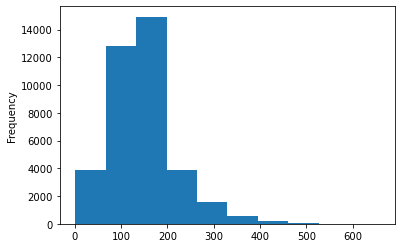

In [17]:
df_valid['AQI'].plot(kind='hist')

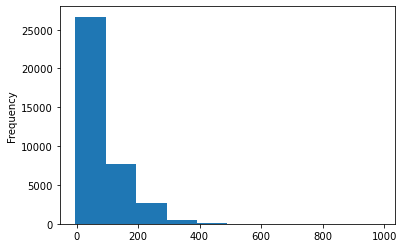

In [18]:
df_valid['Raw Conc.'].plot(kind='hist')

In [19]:
df_valid['AQI Category'].value_counts(normalize=True)

Unhealthy                         0.337386
Moderate                          0.274609
Unhealthy for Sensitive Groups    0.200439
Very Unhealthy                    0.124128
Hazardous                         0.034600
Good                              0.028838
Name: AQI Category, dtype: float64

<h2>Everything appears okay here. Lets move on to the analysis and visualisations of the data: </h2>

[Analysis Notebook](analysis-visualisation.ipynb)

In [20]:
df_valid.to_csv(f'{datapath}/USembassy_dhakadata_clean.csv')